# Predicting house prices using advanced ML

In [70]:
# Set the working directory
import os
#Read the cars.csv data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [71]:
data = pd.read_csv("https://raw.githubusercontent.com/Halaarav/DATA-SCIENCE-PROJECTS/main/kc_house_train_data.csv")

## Assumption : 
## Newly  build houses has better condition rating.

In [72]:
Numerical = []
Categorical = []
for columns in data:
    if (data.dtypes[columns] == 'int64') or (data.dtypes[columns] == 'float64'):
        Numerical.append(columns)
    else:
        Categorical.append(columns)
        
Numerical, Categorical

(['id',
  'price',
  'bedrooms',
  'bathrooms',
  'sqft_living',
  'sqft_lot',
  'floors',
  'waterfront',
  'view',
  'condition',
  'grade',
  'sqft_above',
  'sqft_basement',
  'yr_built',
  'yr_renovated',
  'zipcode',
  'lat',
  'long',
  'sqft_living15',
  'sqft_lot15'],
 ['date'])

In [73]:
def Graph_final(data, columns = '', directory = os.getcwd()):
    
    try:
        if columns == '':                
            org_data = data
        else:
            org_data = data[columns]  
        
        Numerical = []
        Categorical = []
        for columns in data:
            if (data.dtypes[columns] == 'int64') or (data.dtypes[columns] == 'float64'):
                Numerical.append(columns)
            else:
                Categorical.append(columns)       

        print ("***Graphs for Numerical data***\n")
        Discrete = []
        Continuous = []
        for i in Numerical:
            if len(data[i].value_counts())>10:
                print ("***Graph for Continuous data***\n")
                data.boxplot(column = i,grid = True,figsize = (6,4),vert = False)  
                data.hist(column = i,grid = False, bins = 15,figsize = (6,4),color = "turquoise",edgecolor = "blue")
                plt.title(i, fontsize = 14),
                plt.savefig(directory + r'/%s.png' %i)
                plt.show()
            else:
                print ("***Graph for Discrete data***\n")
                data[i].value_counts().plot(kind = 'bar',rot=0,bins = 15, figsize = (10,10),color = "pink",edgecolor = "red",fontsize = 13)
                plt.title(i, fontsize = 14),
                plt.savefig(directory + r'/%s.png' %i)
                plt.show()


        print ("\n***Graphs for Categorical data***\n")
        for i in Categorical or len(data[i].value_counts())<10:
            data[i].value_counts().plot(kind = 'bar',rot=0,bins = 15, figsize = (10,10),color = "yellow",edgecolor = "green",fontsize = 13)
            plt.ylabel('count')
            plt.title(i, fontsize = 14)
            plt.savefig(directory + r'/%s.png' %i)
            plt.show()

    except KeyError:                                        
        print("\nPlease Enter valid column names")
    except FileNotFoundError:                              
        print("\nFile not found. Please enter the valid path of directory")
    except:
        print("\nERROR") 

***Graphs for Numerical data***

***Graph for Continuous data***


File not found. Please enter the valid path of directory


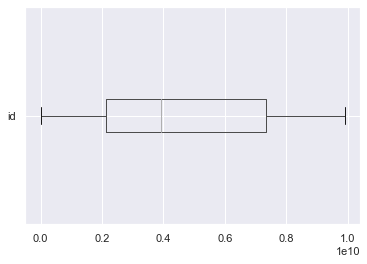

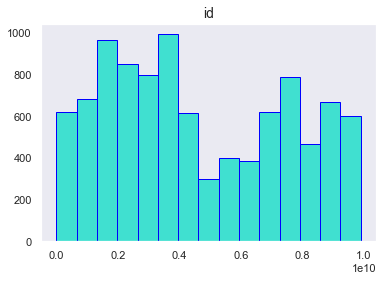

In [74]:
Graph_final(data, ['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade','sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode','lat', 'long', 'sqft_living15', 'sqft_lot15'], directory = r"C:\Users\omsai\Desktop\Data Science Praxis\Pics HP")

In [75]:
data['date'] = pd.to_datetime(data['date']).dt.date  # splitting date and time into a two different column
data['time'] = pd.to_datetime(data['date']).dt.time 
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,time
0,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,00:00:00
1,7237550310,2014-05-12,1225000.0,4,4.50,5420,101930,1.0,0,0,...,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,00:00:00
2,9212900260,2014-05-27,468000.0,2,1.00,1160,6000,1.0,0,0,...,860,300,1942,0,98115,47.6900,-122.292,1330,6000,00:00:00
3,114101516,2014-05-28,310000.0,3,1.00,1430,19901,1.5,0,0,...,1430,0,1927,0,98028,47.7558,-122.229,1780,12697,00:00:00
4,6054650070,2014-10-07,400000.0,3,1.75,1370,9680,1.0,0,0,...,1370,0,1977,0,98074,47.6127,-122.045,1370,10208,00:00:00


In [76]:
data = data.drop(['sqft_living15', 'sqft_lot15', 'time'], axis = 1) #droping 3 unnecessary variables

In [77]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long'],
      dtype='object')

<AxesSubplot:xlabel='bedrooms', ylabel='count'>

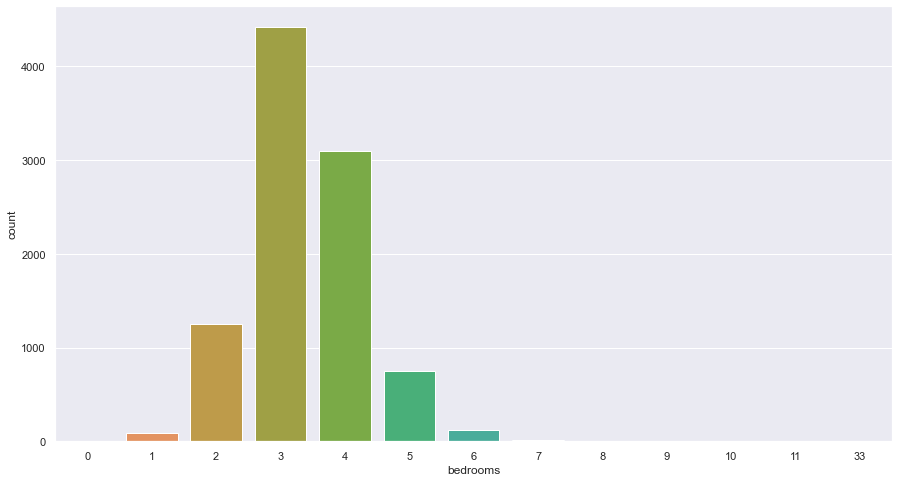

In [78]:
sns.countplot(data.bedrooms)

Observation : Most of the houses has 3 Nos of bedrooms, few houses has 4 no of bedrooms, there are less no of auses with 1,2, 5 & 6 no of bedrooms.

<AxesSubplot:xlabel='grade', ylabel='count'>

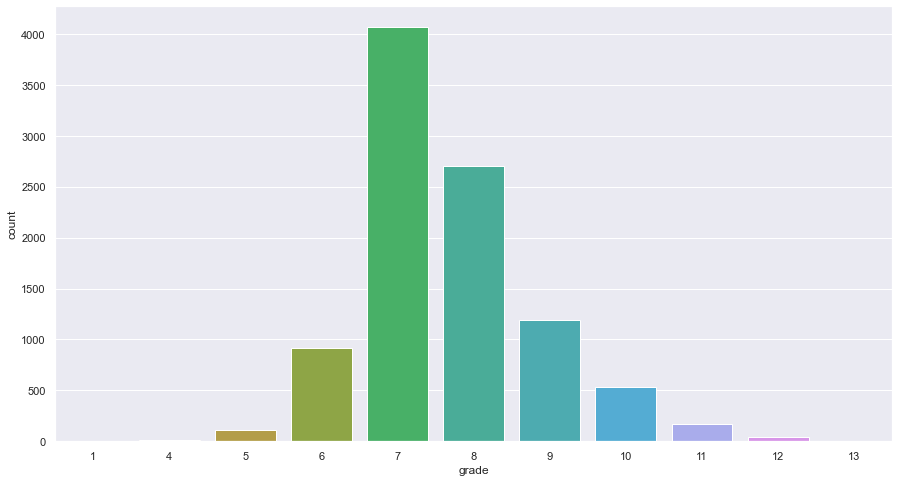

In [79]:
sns.countplot(data.grade)

Observation :  Majority of the houses are with the grade rating of 7 followed by grade rating of 8. we can observe few houses with grade rating 9,6 & 10. here 13 is the highest grade rating means house is very good and 1 is the lowest which means house is not very good. very few no houses are with the grade rating 12 & 13.

In [80]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
count,9.761000e+03,9.761000e+03,9761.000000,9761.000000,9761.000000,9.761000e+03,9761.000000,9761.000000,9761.000000,9761.000000,9761.00000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000
mean,4.605288e+09,5.427350e+05,3.375884,2.117175,2086.734146,1.521526e+04,1.486067,0.008401,0.248028,3.415531,7.66151,1793.291159,293.442987,1970.799508,86.066592,98077.790185,47.560052,-122.214322
std,2.876044e+09,3.795276e+05,0.960697,0.773971,927.194303,4.126673e+04,0.532317,0.091275,0.787877,0.650552,1.18268,835.763817,442.612722,29.240009,405.417369,53.203594,0.140236,0.139895
min,1.200019e+06,8.000000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.00000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.514000
25%,2.126049e+09,3.200000e+05,3.000000,1.750000,1420.000000,5.100000e+03,1.000000,0.000000,0.000000,3.000000,7.00000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.467800,-122.327000
50%,3.905041e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,7.00000,1570.000000,0.000000,1975.000000,0.000000,98065.000000,47.572200,-122.229000
75%,7.338403e+09,6.490000e+05,4.000000,2.500000,2570.000000,1.066000e+04,2.000000,0.000000,0.000000,4.000000,8.00000,2230.000000,570.000000,1996.000000,0.000000,98117.000000,47.680400,-122.126000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,12050.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.00000,8860.000000,3480.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.319000


***Graphs for Numerical data***



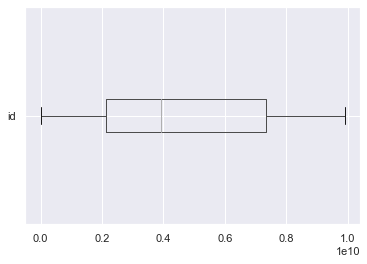

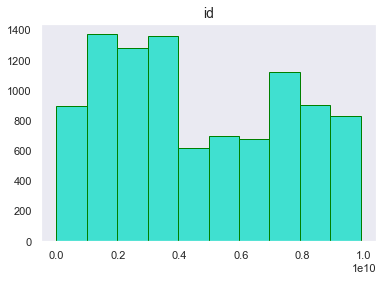

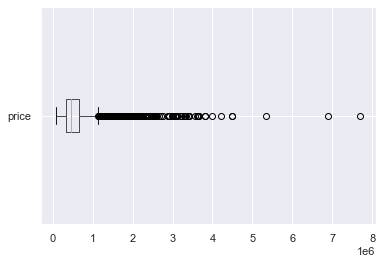

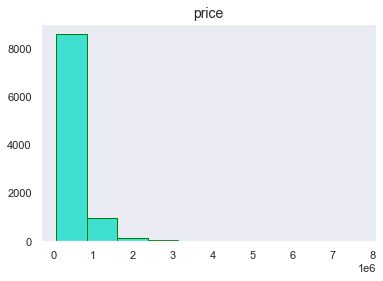

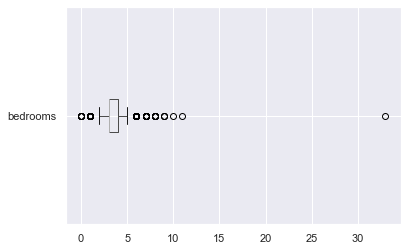

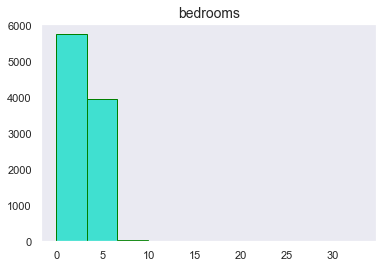

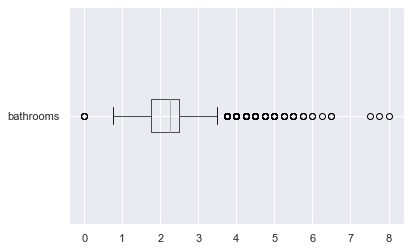

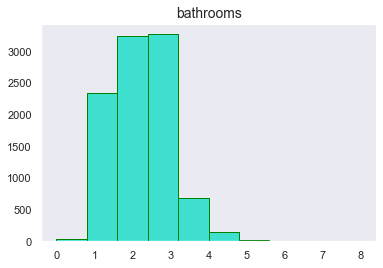

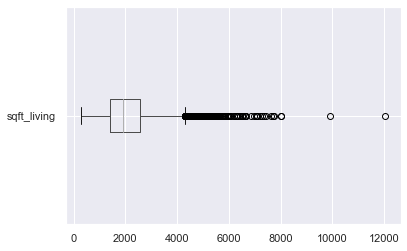

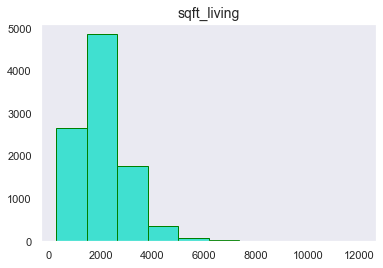

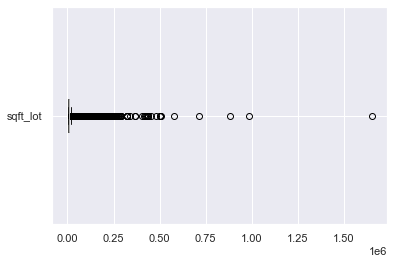

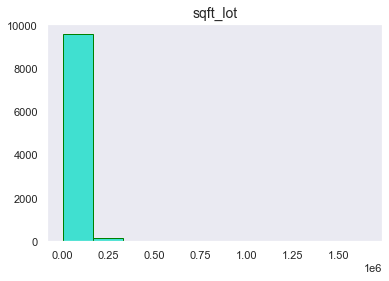

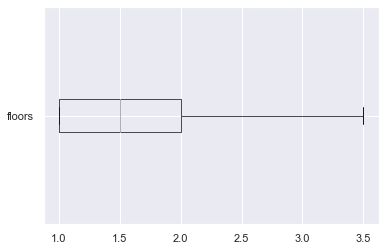

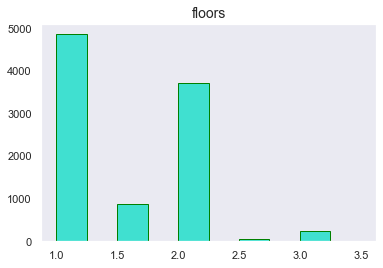

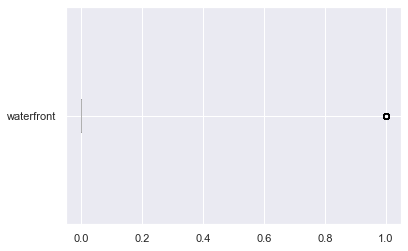

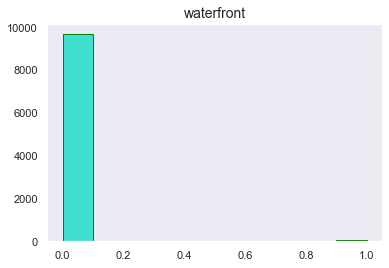

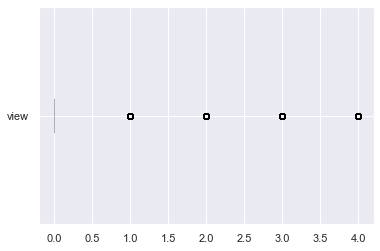

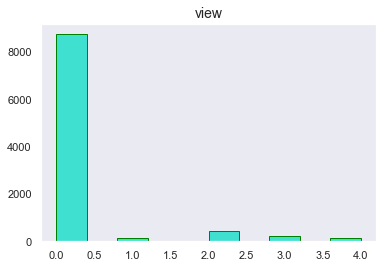

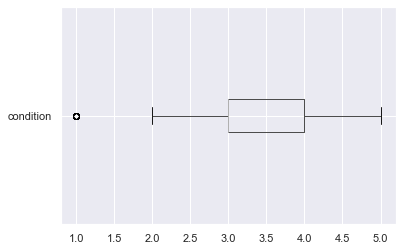

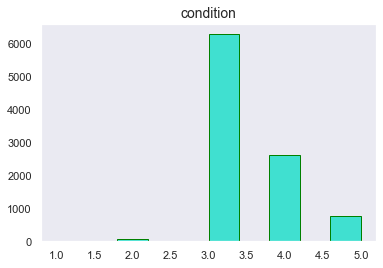

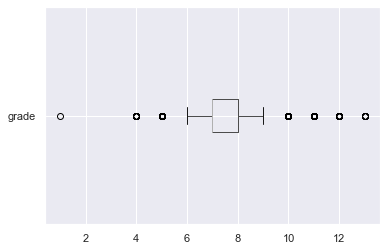

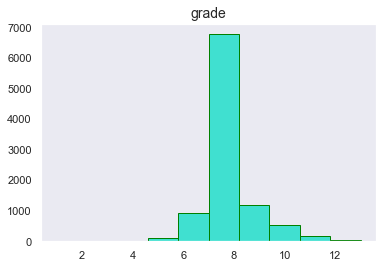

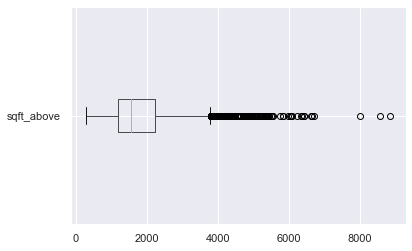

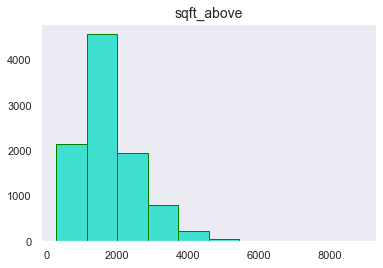

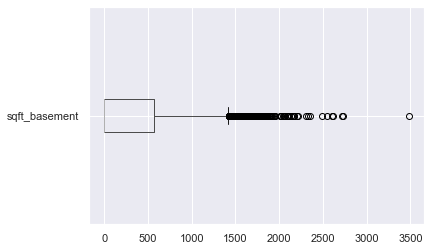

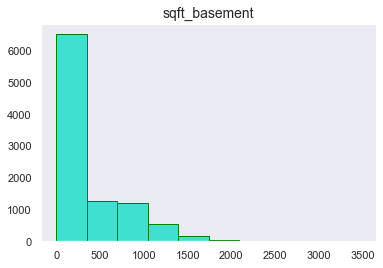

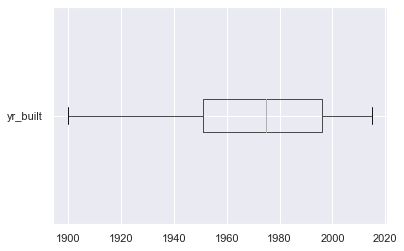

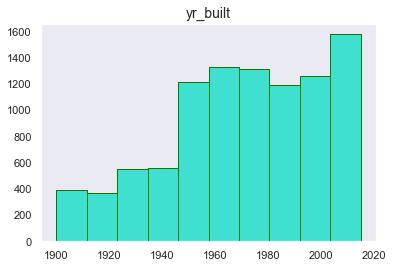

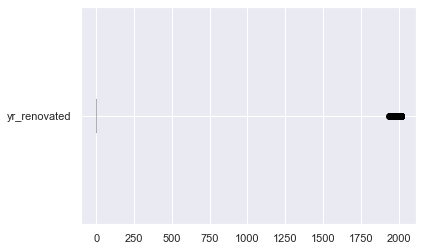

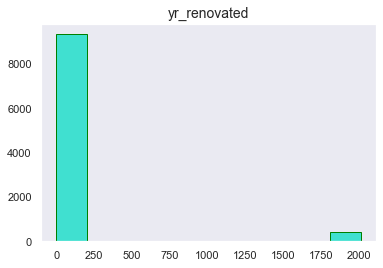

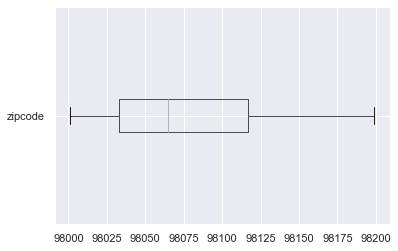

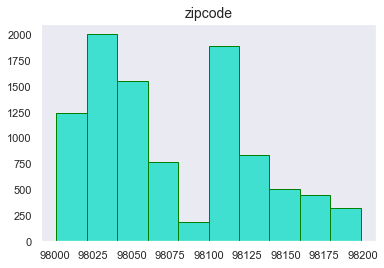

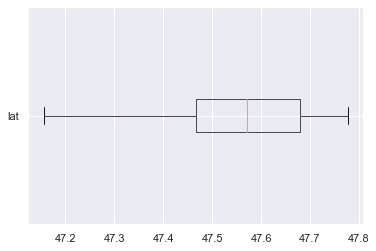

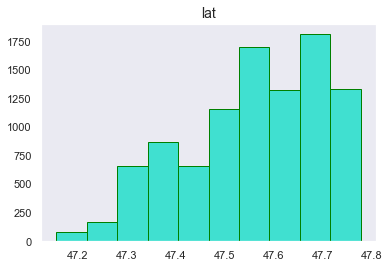

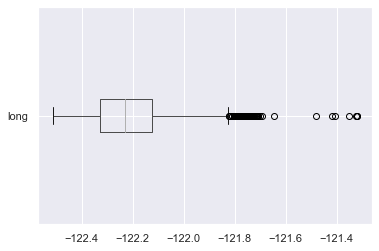

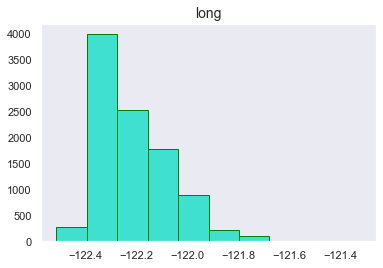

KeyError: "None of [Index(['sqft_living15'], dtype='object')] are in the [columns]"

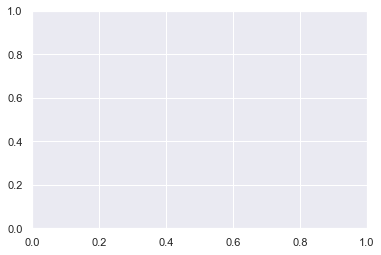

In [81]:
print ("***Graphs for Numerical data***\n")
for i in Numerical:
    data.boxplot(column = i,
         grid = True,     
         figsize = (6,4),   
         vert = False)  
    data.hist(column = i,
         grid = False,
         figsize = (6,4),
         color = "turquoise",
         edgecolor = "green")
    plt.title(i, fontsize = 14),
    plt.show()

print ("\n***Graphs for Categorical data***\n")
for i in Categorical:
    data[i].value_counts().plot(kind = 'bar', 
                                       figsize = (10,10), 
                                       color = "red",
                                       fontsize = 13)
    plt.title(i, fontsize = 14),
    plt.show()

## Observation
**Price** = majority of houses are in the range of 0 t 0.9 million ,few houses are in range of 0.9 to 1.6 millon, very less houses are in range of 1.6 to 2.4.

**Bathrooms** = most of the houses has 2 to 3 no of bathrooms,few houses has 1 no of bathroom and few has 3 to 4 no of houses.

**sqft_living** = most of the houses has sqft_living area 1700 to 2600 , few hosues with area less tha 2000 sqft and some with in area range of 2600 to 4000. least no of houses with area range of 5000 to 6000.

**sqft_lot** = majority of houses are with square_lot area 20000 sqft and very few houses are with sq_lot area greater than 20000.

**floors** = Majority of the houses are with 1 & 2 floors, few with 1.5 floors, some with 3 floors and very less no of houses with 2.5 floors.

**sqft_above** = Majority of the houses has area between 1500 to 2000 sqft, few houses has area range of less than 1500 sqft and between 2000 to 3000 sqft.

**yr_built** = Majority of the houses are built between 2002 to 2017, few houses built between 1950 to 2000 and least no of houses built between 1900 to 1950.

**yr_renovated** = Majority of the houses are not renovated. very few houses were renovated between 1940 to 2000.

**zipcode** = Majority of the houses are in zipcode area 98024 to 98045, second highest no of houses are in zipcode area 98100 to 98120.

**lat** = We can observe that majority if the houses has lat range of 47.5 to 47.8.

**long** = We can observe that majority of the houses has longitude of -122.4 to -122.2.

In [82]:
data.sqft_above[data.sqft_above<7000]

0       1050
1       3890
2        860
3       1430
4       1370
        ... 
9756    1490
9757    2520
9758    2600
9759    1020
9760    1020
Name: sqft_above, Length: 9758, dtype: int64

In [83]:
data.sqft_lot[data.sqft_lot<20000]

0        5000
2        6000
3       19901
4        9680
5        5000
        ...  
9756     1126
9757     6023
9758     7200
9759     1350
9760     1076
Name: sqft_lot, Length: 8732, dtype: int64

In [84]:
waterfront=pd.crosstab(data.waterfront,columns="Count")
waterfront

col_0,Count
waterfront,
0,9679
1,82


In [85]:
value_waterfront=[9679,82]
label_waterfront=["0","1"]

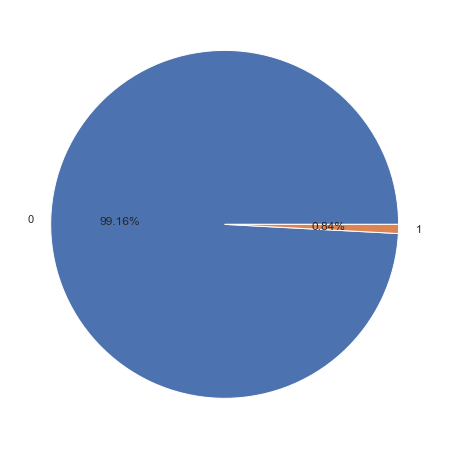

In [86]:
plt.pie(value_waterfront,labels=label_waterfront,autopct="%0.2f%%")
plt.show()

Observation : There is only 0.84% houses has a waterfront annd 99.16% houses are without waterfront in it so we can say there are very less houses with waterfront.

<AxesSubplot:xlabel='view', ylabel='count'>

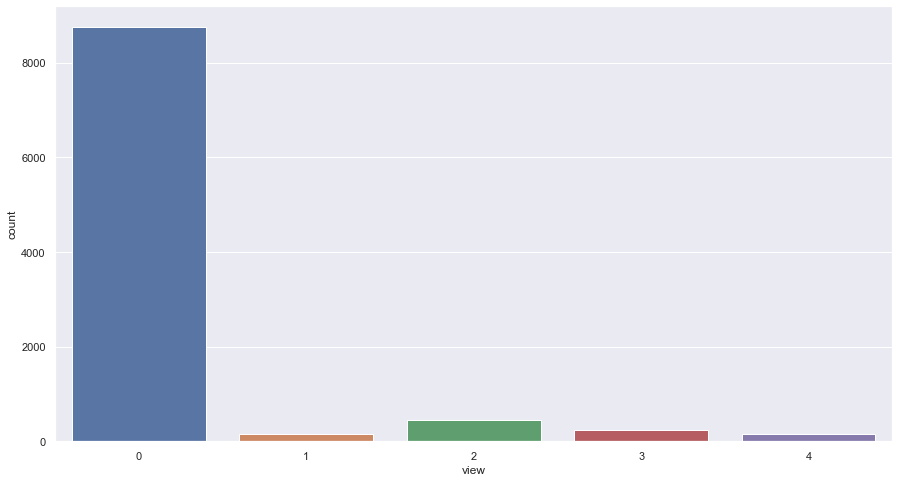

In [87]:
sns.countplot(data.view)

Observation: Majority of the houses are with no view, few houses with 2 no of view and very less no of houses are there with 1, 3 and 4 no of view or visitation.

<AxesSubplot:xlabel='condition', ylabel='count'>

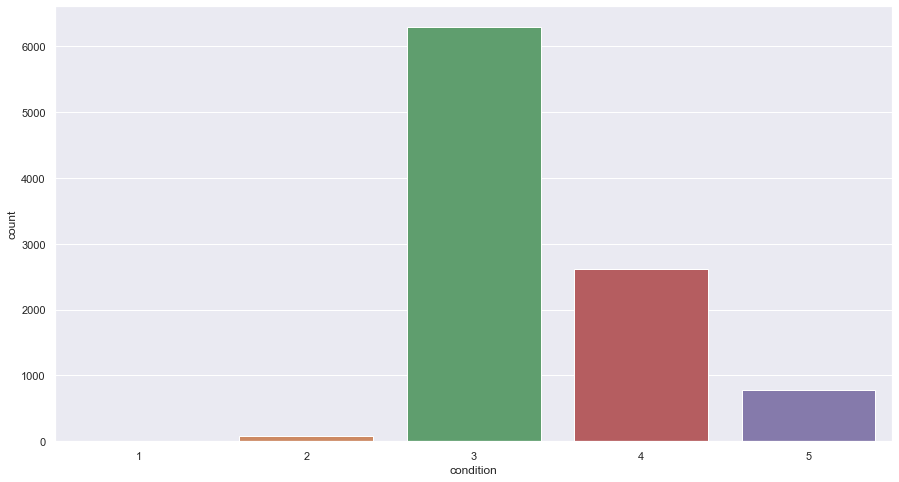

In [88]:
sns.countplot(data.condition)

Observation : majority of the houses are with condition rating 3 which we can say above average,few houses has condition rating of 4, third highest rating is 5 and least rating is 1 & 2.

<AxesSubplot:xlabel='zipcode', ylabel='Density'>

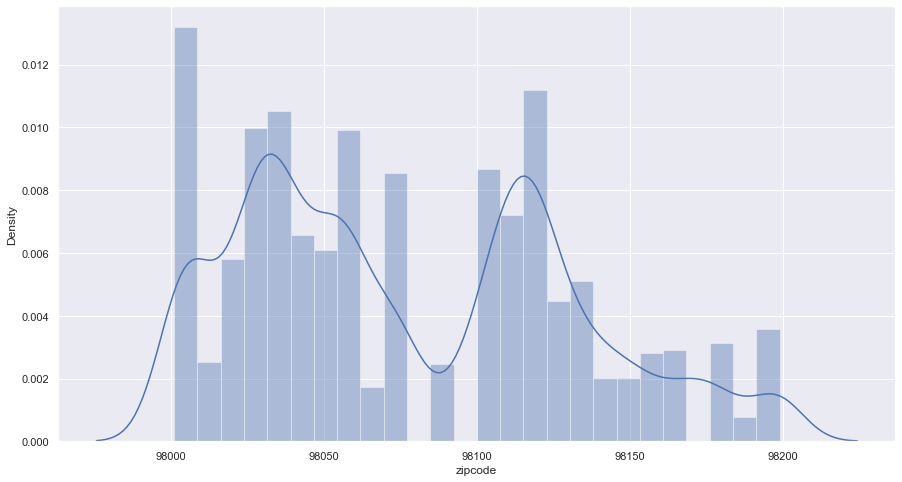

In [89]:
sns.distplot(data.zipcode)

Observation : Maority of the houses has no basement and basement area range of houses with basement is between 100 to 1000 sqft, very few houses with area range of 1000 to 1700.

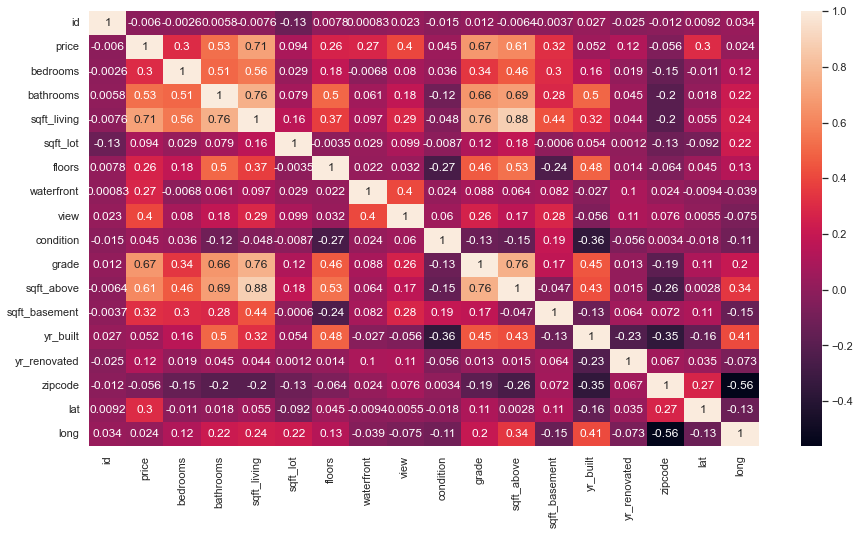

In [90]:
#ploting the heatmap for correlation
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.heatmap(data.corr(), annot=True)

In [91]:
data["bedrooms"] = data["bedrooms"].replace(33,3) # replacing the outlier with mode

In [92]:
data.bedrooms.max() 

11

<AxesSubplot:title={'center':'price'}, xlabel='bedrooms'>

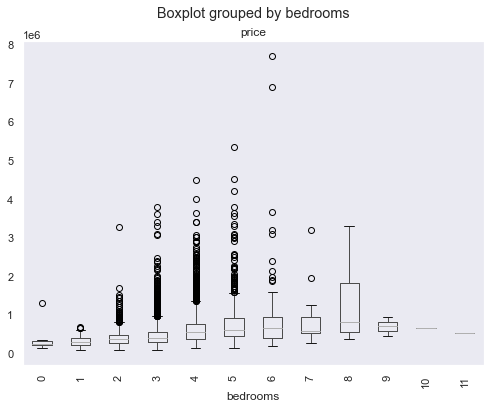

In [93]:
data.boxplot(column="price",
             by="bedrooms",
            grid=False,
            figsize=(8,6),
            rot=90)

**Observation** : We can observe that as the number of bedroom increases price of the house increses.

<AxesSubplot:title={'center':'price'}, xlabel='waterfront'>

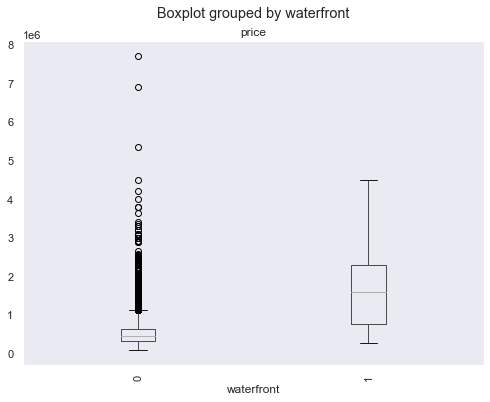

In [94]:
data.boxplot(column="price",
             by="waterfront",
            grid=False,
            figsize=(8,6),
            rot=90)

**Observation** : We can observe that as the houese with waterfromy has higher price compare to houses without waterfront. we can see few house which has higher price which do not include waterfront that may be becuse of the other factors like square ft area,size, location of the house.

<AxesSubplot:title={'center':'price'}, xlabel='view'>

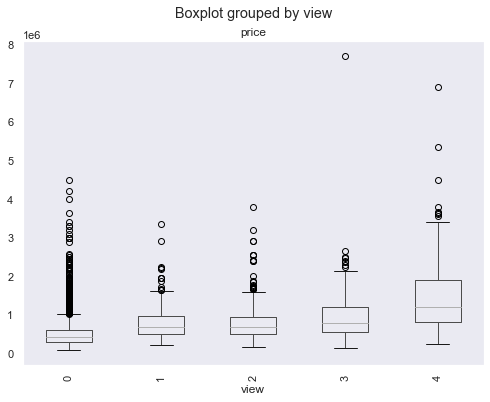

In [95]:
data.boxplot(column="price",
             by="view",
            grid=False,
            figsize=(8,6),
            rot=90)

**Observation** : As per above graph price is increasing with the increment inn the rating of view.

<AxesSubplot:title={'center':'price'}, xlabel='condition'>

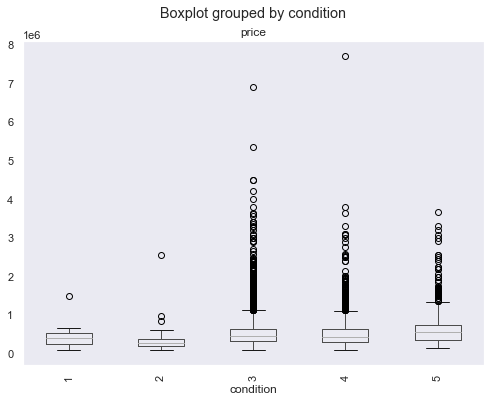

In [96]:
data.boxplot(column="price",
             by="condition",
            grid=False,
            figsize=(8,6),
            rot=90)

**Observation** : 

<AxesSubplot:title={'center':'price'}, xlabel='grade'>

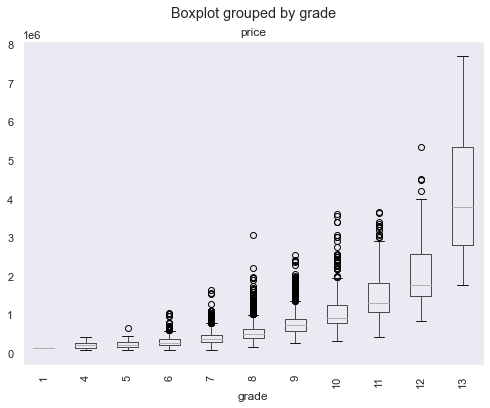

In [97]:
data.boxplot(column="price",
             by="grade",
            grid=False,
            figsize=(8,6),
            rot=90)

**Observation** : 

Text(0.5, 1.0, 'price vs sqft_living')

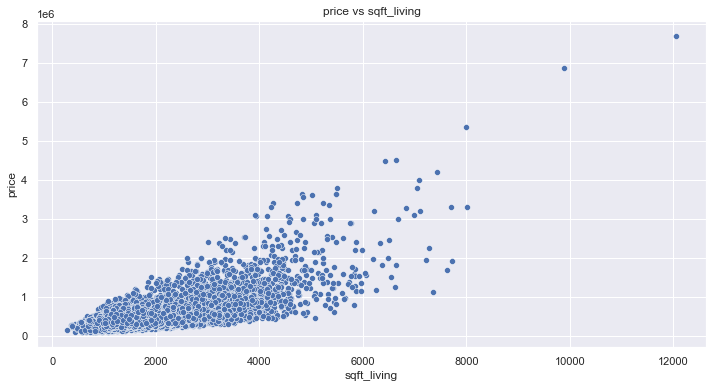

In [98]:
plt.figure(figsize=(12,6))
sns.scatterplot(y='price' , x='sqft_living' , data=data )
plt.title("price vs sqft_living")

**Observation** : As per graph we can observe that price is increasing when sqft_living is increasing. it shows positive correlation.

<AxesSubplot:title={'center':'price'}, xlabel='bathrooms'>

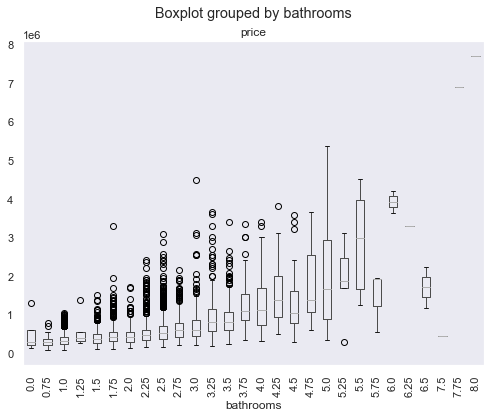

In [99]:
data.boxplot(column="price",
             by="bathrooms",
            grid=False,
            figsize=(8,6),
            rot=90)

**Observation** : We can observe that as no of bathroom is incresing , price of the house is increasing. It shows strongly positive correlation.

<AxesSubplot:title={'center':'price'}, xlabel='floors'>

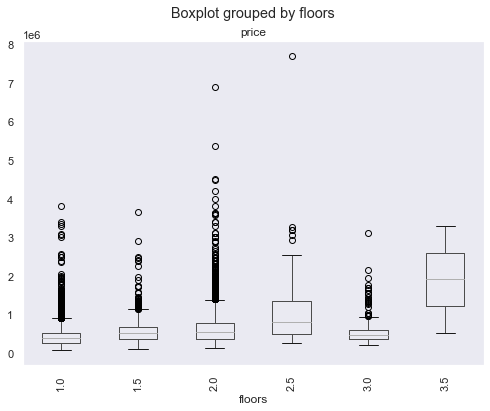

In [100]:
data.boxplot(column="price",
             by="floors",
            grid=False,
            figsize=(8,6),
            rot=90)

**Observation** : 

Text(0.5, 1.0, 'price vs sqft_lot')

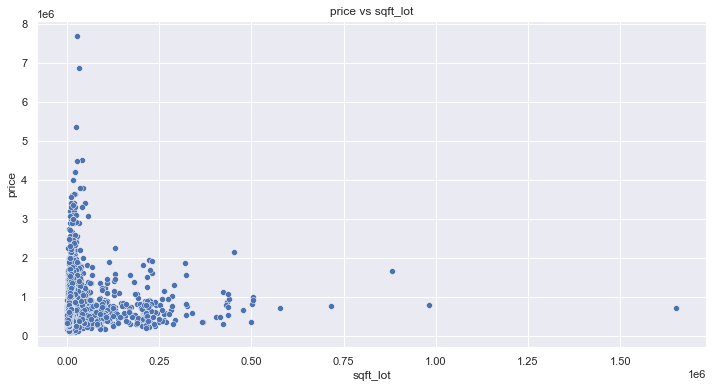

In [101]:
plt.figure(figsize=(12,6))
sns.scatterplot(y='price' , x='sqft_lot' , data=data )
plt.title("price vs sqft_lot")

**Observation** : We can observe that most of the houses has same sqft_lot vale but prices are different that means prices do not incerese with increse in value of sqft_lot. there may be a building with differnt floors and multiple no of houses with differnt size of living area. sqft_lot is not negatively correlated but we can't se strong positive correlation between price and sqft_lot.

Text(0.5, 1.0, 'price vs sqft_above')

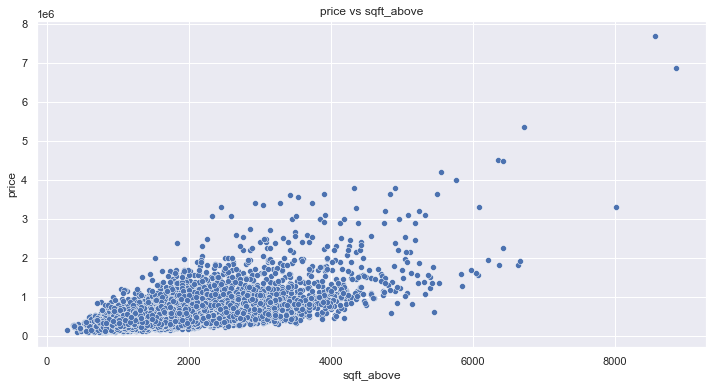

In [102]:
plt.figure(figsize=(12,6))
sns.scatterplot(y='price' , x='sqft_above' , data=data )
plt.title("price vs sqft_above")

**Observation** : As per graph we can observe that sqft_above is positively correlated with price. price of the house incereses as area in sqft_above increses.

Text(0.5, 1.0, 'price vs sqft_basement')

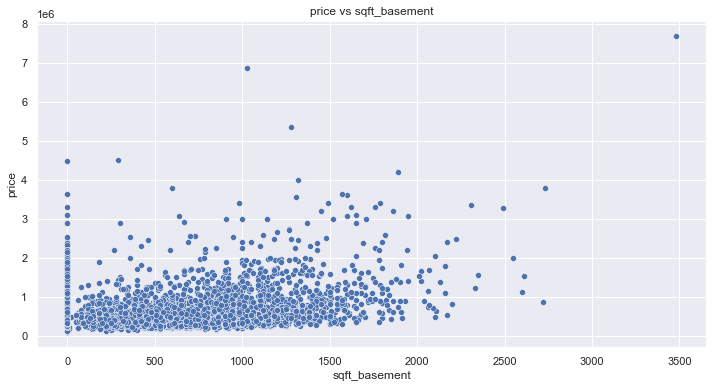

In [103]:
plt.figure(figsize=(12,6))
sns.scatterplot(y='price' , x='sqft_basement' , data=data )
plt.title("price vs sqft_basement")

**Observation** : we can observe that price and sqft_basemet is somewhat correlated. there are few houses with same basement ares have different price that may be beacuse of the other fctors ike total living area of the house, lot area and loction of the house.

Text(0.5, 1.0, 'price vs lat')

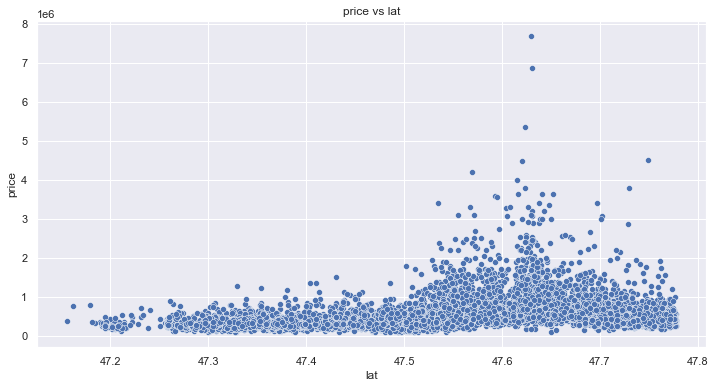

In [104]:
plt.figure(figsize=(12,6))
sns.scatterplot(y='price' , x='lat' , data=data )
plt.title("price vs lat")

**Observation** :  As per above graph price is high in lattitude 47.5 to 47.8.

Text(0.5, 1.0, 'price vs long')

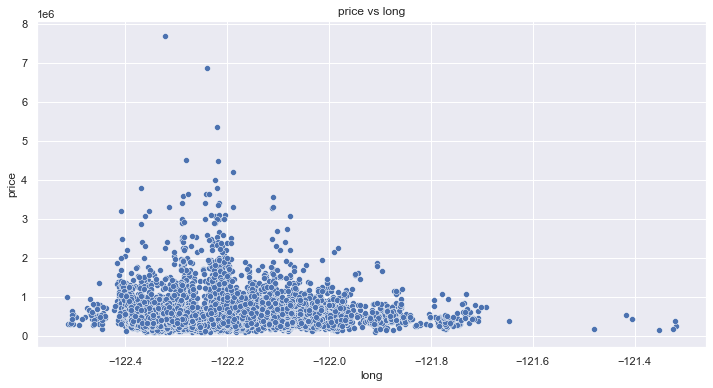

In [105]:
plt.figure(figsize=(12,6))
sns.scatterplot(y='price' , x='long' , data=data)
plt.title("price vs long")

In [106]:
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393
1,7237550310,2014-05-12,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005
2,9212900260,2014-05-27,468000.0,2,1.00,1160,6000,1.0,0,0,4,7,860,300,1942,0,98115,47.6900,-122.292
3,114101516,2014-05-28,310000.0,3,1.00,1430,19901,1.5,0,0,4,7,1430,0,1927,0,98028,47.7558,-122.229
4,6054650070,2014-10-07,400000.0,3,1.75,1370,9680,1.0,0,0,4,7,1370,0,1977,0,98074,47.6127,-122.045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9756,9834201367,2015-01-26,429000.0,3,2.00,1490,1126,3.0,0,0,3,8,1490,0,2014,0,98144,47.5699,-122.288
9757,3448900210,2014-10-14,610685.0,4,2.50,2520,6023,2.0,0,0,3,9,2520,0,2014,0,98056,47.5137,-122.167
9758,7936000429,2015-03-26,1007500.0,4,3.50,3510,7200,2.0,0,0,3,9,2600,910,2009,0,98136,47.5537,-122.398
9759,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299


## Assumption Conclusion :
#### We have made an assumption that house which are new have a better condition rating than older houses.As per above graph we have ananlysed that houses with higher rating (rating 4 & 5) condition is not newly build but also note very old houses. all newly build houses has rating 3 so our assumption was somewhat true.

**Observation** : As per our observation we can analyse tahtprice is high between -122.4 to -122.0.

In [109]:
#For test-train split
from sklearn.model_selection import train_test_split

#For fitting regression tree
from sklearn.tree import DecisionTreeRegressor

#To create a confusion matrix
from sklearn.metrics import confusion_matrix

#For plotting a decision tree
from sklearn import tree
import numpy as np

In [110]:
data1 = data.copy()
data1

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393
1,7237550310,2014-05-12,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005
2,9212900260,2014-05-27,468000.0,2,1.00,1160,6000,1.0,0,0,4,7,860,300,1942,0,98115,47.6900,-122.292
3,114101516,2014-05-28,310000.0,3,1.00,1430,19901,1.5,0,0,4,7,1430,0,1927,0,98028,47.7558,-122.229
4,6054650070,2014-10-07,400000.0,3,1.75,1370,9680,1.0,0,0,4,7,1370,0,1977,0,98074,47.6127,-122.045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9756,9834201367,2015-01-26,429000.0,3,2.00,1490,1126,3.0,0,0,3,8,1490,0,2014,0,98144,47.5699,-122.288
9757,3448900210,2014-10-14,610685.0,4,2.50,2520,6023,2.0,0,0,3,9,2520,0,2014,0,98056,47.5137,-122.167
9758,7936000429,2015-03-26,1007500.0,4,3.50,3510,7200,2.0,0,0,3,9,2600,910,2009,0,98136,47.5537,-122.398
9759,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299


In [111]:
# Replacing years with 1, to fit the data with numerical values in model
data1.loc[data1["yr_renovated"] != 0,"yr_renovated"] = "1"

In [112]:
# Changing a name of yr_renovated to renovated as we have removed the years
data1.rename(columns = {"yr_renovated" : "renovated"},inplace = True)
data1

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,renovated,zipcode,lat,long
0,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393
1,7237550310,2014-05-12,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005
2,9212900260,2014-05-27,468000.0,2,1.00,1160,6000,1.0,0,0,4,7,860,300,1942,0,98115,47.6900,-122.292
3,114101516,2014-05-28,310000.0,3,1.00,1430,19901,1.5,0,0,4,7,1430,0,1927,0,98028,47.7558,-122.229
4,6054650070,2014-10-07,400000.0,3,1.75,1370,9680,1.0,0,0,4,7,1370,0,1977,0,98074,47.6127,-122.045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9756,9834201367,2015-01-26,429000.0,3,2.00,1490,1126,3.0,0,0,3,8,1490,0,2014,0,98144,47.5699,-122.288
9757,3448900210,2014-10-14,610685.0,4,2.50,2520,6023,2.0,0,0,3,9,2520,0,2014,0,98056,47.5137,-122.167
9758,7936000429,2015-03-26,1007500.0,4,3.50,3510,7200,2.0,0,0,3,9,2600,910,2009,0,98136,47.5537,-122.398
9759,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299


In [113]:
# succesfully replaced years with 1 and for the house which are not renovated are already 0
data1.loc[data1["renovated"] != 0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,renovated,zipcode,lat,long
56,4389200955,2015-03-02,1450000.0,4,2.75,2750,17789,1.5,0,0,3,8,1980,770,1914,1,98004,47.6141,-122.212
92,6300000550,2014-07-17,464000.0,6,3.00,2300,3404,2.0,0,0,3,7,1600,700,1920,1,98133,47.7067,-122.343
100,8096000060,2015-04-13,655000.0,2,1.75,1450,15798,2.0,1,4,3,7,1230,220,1915,1,98166,47.4497,-122.375
104,7228500560,2015-03-20,410000.0,4,1.00,1970,4740,1.5,0,0,3,7,1670,300,1904,1,98122,47.6136,-122.303
119,7960900060,2015-05-04,2900000.0,4,3.25,5050,20100,1.5,0,2,3,11,4750,300,1982,1,98004,47.6312,-122.223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8847,722059020,2015-03-18,550000.0,6,4.50,4520,40164,2.0,0,0,3,9,3580,940,1953,1,98031,47.4070,-122.216
8869,6821101285,2014-08-14,819000.0,3,1.75,1850,6000,1.5,0,0,3,8,1650,200,1913,1,98199,47.6528,-122.401
9086,126039256,2014-09-04,434900.0,3,2.00,1520,5040,2.0,0,0,3,7,1520,0,1977,1,98177,47.7770,-122.362
9260,3319500628,2015-02-12,356999.0,3,1.50,1010,1546,2.0,0,0,3,8,1010,0,1971,1,98144,47.5998,-122.311


## First Model

## Experiment:

### We are considering bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,renovated as from bivariate analysis we can some positive effect on price. we have dropped variable sqft_above and sqft_basement as we have observed that addition of sqft_above and sqft_basement is giving output same as sqft_living area. we have transfomed yr_renovated to renovated by replacing year with 1, which represents house is renovated and we are not considering year that in hich year it is renovated. here we have considered max depth 10 and min sample leaf 10 randomly.

In [114]:
X = data1.drop(["id","price","date","sqft_basement","lat","long","sqft_above","sqft_basement","yr_built","zipcode"], axis=1)
y = data1.price

In [115]:
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,renovated
0,4,3.00,1960,5000,1.0,0,0,5,7,0
1,4,4.50,5420,101930,1.0,0,0,3,11,0
2,2,1.00,1160,6000,1.0,0,0,4,7,0
3,3,1.00,1430,19901,1.5,0,0,4,7,0
4,3,1.75,1370,9680,1.0,0,0,4,7,0


In [116]:
#Train-Validation Split
X_train,X_valid,y_train,y_valid=train_test_split(X,y,test_size=0.2)

In [117]:
# Fitting a regression tree
reg_tree = DecisionTreeRegressor(max_depth=10, min_samples_leaf=10) 
reg_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=10)

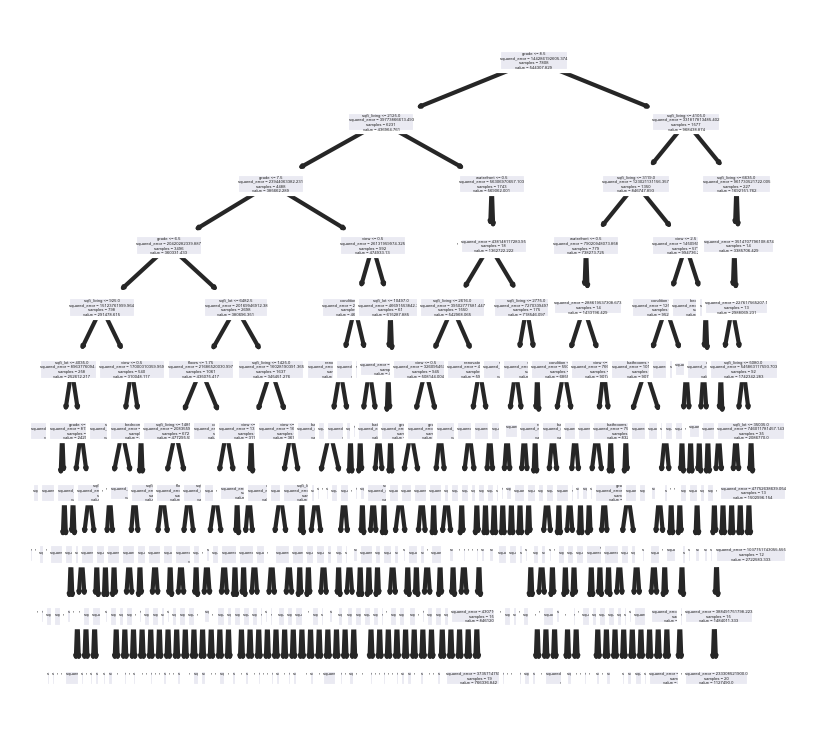

In [118]:
# Plotting a regression tree
fig, axes = plt.subplots(figsize=(3,3), dpi=300)

tree.plot_tree(reg_tree, feature_names=list(X), filled = False)

plt.show()

In [119]:
#Prediction
y_pred = reg_tree.predict(X_valid)
y_pred

array([268168.36842105, 427940.09090909, 501716.66666667, ...,
       627442.14414414, 690104.92592593, 454337.22535211])

###  Model Performance Check

In [120]:
# MAE
np.mean(np.abs(y_valid - y_pred))

136387.08035551195

In [121]:
# MSE
np.mean((y_valid - y_pred)**2)

44846837703.825

In [122]:
# RMSE
np.sqrt(np.mean((y_valid - y_pred)**2))

211770.71965648368

In [123]:
# MAPE
np.mean(np.abs(y_valid - y_pred)/y_valid)*100

28.492167585436494

**Observation**:

We are getitng MAPE(Mean absoloute percentage error) as 25.28% here which high so we will perform feature engineering to reduce error.

In [124]:
# Adding New column to find age of house
year = []
year_built = []
for i in data1.index:
    year = pd.DatetimeIndex(data1['date']).year
    year_built = data1.yr_built
    data1.yr_built[i] = year[i] - year_built[i]

In [125]:
# Renaming the column as Age of house
data1.rename(columns = {"yr_built" : "Age_of_the_house"}, inplace = True)

## Second Model

In [126]:
X = data1.drop(["id","price","date","lat","sqft_above","zipcode","sqft_lot","long"], axis=1)
y = data1.price

## Experiment:

### We have added one new column here called Age_of_the_house. we have excluded the sqft_above as sqft_living already covers it. sqft_basement we have included here to see if there is any impact of it on the model when it is used alone without considering sqft_above area and anyeay it is included in sqft_living area so we believe it won't make much difference if we include sqft_above or not. Here we are considering max depth 15 and min sample leaf as 5 randomly.

In [127]:
X.head()

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_basement,Age_of_the_house,renovated
0,4,3.00,1960,1.0,0,0,5,7,910,49,0
1,4,4.50,5420,1.0,0,0,3,11,1530,13,0
2,2,1.00,1160,1.0,0,0,4,7,300,72,0
3,3,1.00,1430,1.5,0,0,4,7,0,87,0
4,3,1.75,1370,1.0,0,0,4,7,0,37,0


In [128]:
#Train-Validation Split
X_train,X_valid,y_train,y_valid=train_test_split(X,y,test_size=0.2,random_state=0)

In [129]:
# Fitting a regression tree
reg_tree = DecisionTreeRegressor(max_depth=15, min_samples_leaf=5) 
reg_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=15, min_samples_leaf=5)

In [ ]:
# Plotting a regression tree
fig, axes = plt.subplots(figsize=(3,3), dpi=300)

tree.plot_tree(reg_tree, feature_names=list(X), filled = False)

plt.show()

In [ ]:
#Prediction
y_pred = reg_tree.predict(X_valid)
y_pred

In [ ]:
# MAE
np.mean(np.abs(y_valid - y_pred))

In [ ]:
# MSE
np.mean((y_valid - y_pred)**2)

In [ ]:
# RMSE
np.sqrt(np.mean((y_valid - y_pred)**2))

In [ ]:
# MAPE
np.mean(np.abs(y_valid - y_pred)/y_valid)*100

**Observation** : We have observed 28.74% error with these set of predictors.

## Third Model

In [ ]:
X = data1.drop(["id","price","date","lat","sqft_above","sqft_basement","zipcode","sqft_lot","long","condition","view","bedrooms"], axis=1)
y = data1.price

## Experiment:

### Here we have tried different predictors which we thought could predict the price better and removed few variables with variables on which feature engineering has not performed yet. 

In [ ]:
y.head()

In [ ]:
#Train-Validation Split
X_train,X_valid,y_train,y_valid=train_test_split(X,y,test_size=0.2)

In [ ]:
# Fitting a regression tree
reg_tree = DecisionTreeRegressor(max_depth=10, min_samples_leaf=5) 
reg_tree.fit(X_train, y_train)

In [ ]:
# Plotting a regression tree
fig, axes = plt.subplots(figsize=(3,3), dpi=300)

tree.plot_tree(reg_tree, feature_names=list(X), filled = False)

plt.show()

In [ ]:
#Prediction
y_pred = reg_tree.predict(X_valid)
y_pred

In [ ]:
# MAE
np.mean(np.abs(y_valid - y_pred))

In [ ]:
# MSE
np.mean((y_valid - y_pred)**2)

In [ ]:
# RMSE
np.sqrt(np.mean((y_valid - y_pred)**2))

In [ ]:
# MAPE
np.mean(np.abs(y_valid - y_pred)/y_valid)*100

**Observation** : We ahve observed 28.60% accuracy in this model.

## Fourth Model

In [ ]:
X = data1.drop(["price","date"], axis=1)
y = data1.price

## Experiment:

 ### Here we are experimenting by using all the predictores except target variable and date to check the performannce of the model.

In [ ]:
X.head()

In [ ]:
#Train-Validation Split
X_train,X_valid,y_train,y_valid=train_test_split(X,y,test_size=0.2)

In [ ]:
# Fitting a regression tree
reg_tree = DecisionTreeRegressor(max_depth=10, min_samples_leaf=5) 
reg_tree.fit(X_train, y_train)

In [ ]:
# Plotting a regression tree
fig, axes = plt.subplots(figsize=(3,3), dpi=300)

tree.plot_tree(reg_tree, feature_names=list(X), filled = False)

plt.show()

In [ ]:
#Prediction
y_pred = reg_tree.predict(X_valid)
y_pred

In [ ]:
# MAE
np.mean(np.abs(y_valid - y_pred))

In [ ]:
# RMSE
np.sqrt(np.mean((y_valid - y_pred)**2))

In [ ]:
# MAPE
np.mean(np.abs(y_valid - y_pred)/y_valid)*100

**Observation** : We are getting 17.37% accuracy when we are considering all the variable as predictors given in the dataset.

### Hyperparameter Tuning - Choosing Best Depth

In [ ]:
depth = np.arange(1,15)
mae = []

for k in depth:
    reg_tree = DecisionTreeRegressor(max_depth=k, min_samples_leaf=5)
    reg_tree.fit(X_train, y_train)
    y_pred = reg_tree.predict(X_valid)
    mae.append(np.mean(np.abs(y_valid - y_pred))) 

In [ ]:
plt.plot(depth, np.array(mae))
plt.show()

**Observation** : By performing hyper parameter tuning we are getting least error at depth = 10, so we will be using depth 10 in our further model processing.

## Fifth Model

## Experiment : 
### Here we are scaling the target variable using log transformation and with few set pf predictors we are checking the error rate in this model. 

In [ ]:
X = data1.drop(["id","price","date","sqft_basement","lat","long","sqft_above","sqft_basement","zipcode"], axis=1)
y = data1.price
Y = np.log(y) # applying log transformation to target variable

In [ ]:
X.head()

In [ ]:
Y # Scaled target variable

In [ ]:
#Train-Validation Split
X_train,X_valid,y_train,y_valid=train_test_split(X,Y,test_size=0.2,random_state=0)

In [ ]:
# Fitting a regression tree
reg_tree = DecisionTreeRegressor(max_depth=10, min_samples_leaf=5) 
reg_tree.fit(X_train, y_train)

In [ ]:
# Plotting a regression tree
fig, axes = plt.subplots(figsize=(3,3), dpi=300)

tree.plot_tree(reg_tree, feature_names=list(X), filled = False)

plt.show()

In [ ]:
#Prediction
y_pred = reg_tree.predict(X_valid)
y_pred

In [ ]:
# MAE
np.mean(np.abs(y_valid - y_pred))

In [ ]:
# RMSE
np.sqrt(np.mean((y_valid - y_pred)**2))

In [ ]:
# MAPE
np.mean(np.abs(y_valid - y_pred)/y_valid)*100

**Observatuon** : By applying log transormation to target variable we got the error rate 1.93099. which doens't seem quite right and we will further try different experiment to achieve correct error rate.

In [ ]:
# converted zipcode to dummies
data2 = pd.get_dummies(data1, columns = ['zipcode'], prefix = "Zip 98", prefix_sep = "")

In [ ]:
data2 

## Sixth Model

## Experiment : 
### Here we have included all the columns we have performed feature engineering on with some set of predictors which is affetcing price of the house. for zipcode we have transformed into a dummies of 72 columns as we have 72 unique zipcodes.

In [ ]:
X = data2.drop(["id","price","date","lat","long","sqft_above","sqft_lot"], axis=1)
y = data2.price

In [ ]:
X = data2.drop(["id","price","date","lat","long","sqft_above","sqft_basement","sqft_lot"], axis=1)
y = data2.price

In [ ]:
X.head()

In [ ]:
#Train-Validation Split
X_train,X_valid,y_train,y_valid=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
# Fitting a regression tree
reg_tree = DecisionTreeRegressor(max_depth=10, min_samples_leaf=5) 
reg_tree.fit(X_train, y_train)

In [ ]:
# Plotting a regression tree
fig, axes = plt.subplots(figsize=(3,3), dpi=300)

tree.plot_tree(reg_tree, feature_names=list(X), filled = False)

plt.show()

In [ ]:
#Prediction
y_pred = reg_tree.predict(X_valid)
y_pred

In [ ]:
# MAE
np.mean(np.abs(y_valid - y_pred))

In [ ]:
# RMSE
np.sqrt(np.mean((y_valid - y_pred)**2))

In [ ]:
# MAPE
np.mean(np.abs(y_valid - y_pred)/y_valid)*100

**Observation** : After including zipcode with few set of predictors we are observing 24.76% error rate which is little lesser than our previous model for which we have observed 29.81% error rate.

In [ ]:
data3 = data1.copy() # copying a data into a new variable to add new columns with log transformation
data3

In [ ]:
data3["logged_sqft_living"] = np.log(data3.sqft_living) # Appliyng log transformation to sqft_living

In [ ]:
Y

In [ ]:
data3.head()

## Experiment :  
### Here we have used variables after applying log transformation with set of other preditors. on two variables we have applied log transformation in this experiment which are price and sqft_living. 

In [ ]:
X = data3.drop(["id","price","date","lat","long","sqft_above","sqft_basement","sqft_lot","sqft_living"], axis=1)
y = data2.price

In [ ]:
X.head()

In [ ]:
#Train-Validation Split
X_train,X_valid,y_train,y_valid=train_test_split(X,Y,test_size=0.2,random_state=0)

In [ ]:
# Fitting a regression tree
reg_tree = DecisionTreeRegressor(max_depth=10, min_samples_leaf=5) 
reg_tree.fit(X_train, y_train)

In [ ]:
# Plotting a regression tree
fig, axes = plt.subplots(figsize=(3,3), dpi=300)

tree.plot_tree(reg_tree, feature_names=list(X), filled = False)

plt.show()

In [ ]:
#Prediction
y_pred = reg_tree.predict(X_valid)
y_pred

In [ ]:
# MAE
np.mean(np.abs(y_valid - y_pred))

In [ ]:
# RMSE
np.sqrt(np.mean((y_valid - y_pred)**2))

In [ ]:
# MAPE
np.mean(np.abs(y_valid - y_pred)/y_valid)*100

**Observation** : By using 2 variables(price and sqft_living) with log transformation, we are getting error rate of 1.67% which is almost same as when we apply only price variable with log transformation.

In [ ]:
data3["Year of Selling"] = pd.DatetimeIndex(data3["date"]).year
data3[["Year of Selling"]]

## Performing same steps of Feature Engineering on our Test Data.

In [ ]:
import os
import pandas as pd
os.chdir(r"C:\Users\omsai\Downloads")
test_data = pd.read_csv("kc_house_test_data.csv")

In [ ]:
test_data.head()

In [ ]:
test_data['date'] = pd.to_datetime(test_data['date']).dt.date  # splitting date and time into a two different column
test_data['time'] = pd.to_datetime(test_data['date']).dt.time 


In [ ]:
test_data = test_data.drop(['sqft_living15', 'sqft_lot15', 'time'], axis = 1) #droping 3 unnecessary variables

In [ ]:
test_data.head()

In [ ]:
year1 = []
year_built1 = []
for i in test_data.index:
    year1 = pd.DatetimeIndex(test_data['date']).year
    year_built1 = test_data.yr_built
    test_data.yr_built[i] = year1[i] - year_built1[i]

In [ ]:
test_data

In [ ]:
test_data.rename(columns = {"yr_built" : "Age_of_the_house"}, inplace = True)

In [ ]:
test_data

In [ ]:
# Replacing years with 1, to fit the data with numerical values in model
test_data.loc[test_data["yr_renovated"] != 0,"yr_renovated"] = "1"

In [ ]:
# Changing a name of yr_renovated to renovated as we have removed the years
test_data.rename(columns = {"yr_renovated" : "renovated"},inplace = True)

In [ ]:
test_data

## Testing Model 1 with our Test Data.

In [ ]:
X_train = data1.drop(["id","price","date","sqft_basement","lat","long","sqft_above","sqft_basement","yr_built","zipcode"], axis=1)
y_train = data1.price

In [ ]:
X_test = test_data.drop(["id","price","date","sqft_basement","lat","long","sqft_above","sqft_basement","Age_of_the_house","zipcode"], axis=1)
y_test = test_data.price

In [ ]:
reg_tree = DecisionTreeRegressor(max_depth=10, min_samples_leaf=10) #greedy algorithm
reg_tree.fit(X_train, y_train)

In [ ]:
#Predicting price for our same predictors using test data.
y_pred = reg_tree.predict(X_test)
y_pred

## Model Performance Checks

In [ ]:
# MAE
np.mean(np.abs(y_test - y_pred))

In [ ]:
# MSE
np.mean((y_test - y_pred)**2)

In [ ]:
# RMSE
np.sqrt(np.mean((y_test - y_pred)**2))

In [ ]:
# MAPE
np.mean(np.abs(y_test - y_pred)/y_test)*100

### Here we saw an increased Mean Error Percentage as compared to the model that was fitted initially on the training data. 

## Now Testing Model 6 with same Test Data.

In [ ]:
test_data1 = test_data.copy()

In [ ]:
test_data1

In [ ]:
data2 = data1.copy()

In [ ]:
year2 = []
year_built2 = []
for i in data2.index:
    year2 = pd.DatetimeIndex(data2['date']).year
    year_built2 = data2.yr_built
    data2.yr_built[i] = year2[i] - year_built2[i]

In [ ]:
data2.rename(columns = {"yr_built" : "Age_of_the_house"}, inplace = True)

In [ ]:
# Replacing years with 1, to fit the data with numerical values in model
data2.loc[data2["yr_renovated"] != 0,"yr_renovated"] = "1"

In [ ]:
# Changing a name of yr_renovated to renovated as we have removed the years
data2.rename(columns = {"yr_renovated" : "renovated"},inplace = True)

In [ ]:
data2 = pd.get_dummies(data1, columns = ['zipcode'], prefix = "Zip 98", prefix_sep = "")

In [ ]:
test_data1 = pd.get_dummies(data1, columns = ['zipcode'], prefix = "Zip 98", prefix_sep = "")

In [ ]:
X_train = data2.drop(["id","price","date","lat","long","sqft_above","sqft_basement","sqft_lot"], axis=1)
y_train = data2.price

In [ ]:
X_test = test_data1.drop(["id","price","date","lat","long","sqft_above","sqft_basement","sqft_lot"], axis=1)
y_test = test_data1.price

In [ ]:
reg_tree6 = DecisionTreeRegressor(max_depth=10, min_samples_leaf=10) #greedy algorithm
reg_tree6.fit(X_train, y_train)

In [ ]:
y_pred6 = reg_tree6.predict(X_test)
y_pred6

In [ ]:
# MAE
np.mean(np.abs(y_test - y_pred6))

In [ ]:
# MSE
np.mean((y_test - y_pred6)**2)

In [ ]:
# RMSE
np.sqrt(np.mean((y_test - y_pred6)**2))

In [ ]:
#MAPE
np.mean(np.abs(y_test - y_pred6)/y_test)*100

## The error rate decreases.